# Data Analysis with python II (tutorial)

## Wladimir E. Banda-Barragán

When you finish, you can call your notebook with the TEAM's name, e.g. TEAM_name.ipynb, and also include your names in the notebook. Then, you can create a pull request to the subfolder **homework** in Session 3.

Note that some data for the exercises are not given on purpose. Use online material to **investigate** what data you need to solve the problems.

Within a **single python notebook**, add the following:

# **TEAM Magnetic**
## - **Joseth Pachacama**
## - **Jack Rojas**

## **Problem 1.**
Calculate:


 - The pressure of the plasma permeating the Solar corona. How does it compare to Earth's atmospheric pressure at the sea level? The number density of the Solar corona is $n=10^9\,\rm cm^{-3}$ and its temperature is $T=2\times 10^6\,\rm K$.
 
 
 - The polytropic index of carbon-monoxide (CO) gas. Hint: Get the degrees of freedom first.


 - Calculate  the mean particle mass (mean molecular weight) of air in our atmosphere (remember Nytrogen is the most abundant element). Once calculated, add it to the phase diagram $T$ vs. $\mu$ shown in class. How does the value compare to that of atomic hydrogen?


 - The Reynolds number of the blood flow in the aorta. Hint: Use the Internet to get the parameters you need.

## **Pressure of the plasma permeating the Solar corona:**

If we assume the gas is ideal, the EOS is:

$$p = n\,k_B\,T,$$

where $p$ is the thermal pressure.

Plasma permeating the Solar corona have temperatures and number densities of:

$$T_{\rm psc} = 2 \times 10^{6}\,\rm K$$
$$n_{\rm psc} = 10^{9}\,\rm cm^{-3}$$

On the other hand, Earth's sea level has:

$$T_{\rm atm} = 298.15\,\rm K = 10^{2.47}\,\rm K$$
$$n_{\rm atm} = 2.504 \times 10^{19}\,\rm cm^{-3}$$

Using the EOS, we obtain the following pressures in $[\rm dyne\,cm^{-2}]$:

In [ ]:
# Import some libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the EOS equation
def pressure(n, T):
    return (n*1.38e-16*T)

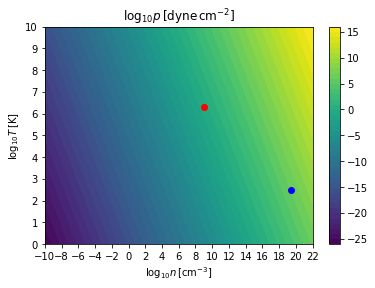

Plasma permeating the Solar corona: 2.76000e-01
Dry air in the atmosphere of our planet: 1.01980e+06


In [ ]:
# Plot pressure again, including the two points above.
n1 = 9 #log
T1 = np.log10(2*10**6.0)

n2 = 19.3986343245
T2 = 2.47

# Create a 2D grid with n and T as X and Y.
number_density = np.arange(-10,22,0.01)
temperature = np.arange(0,10,0.01)

X, Y = np.meshgrid(number_density, temperature)

# Compute pressure on the grid
pressure_2D = np.array(pressure(np.ravel(10**X), np.ravel(10**Y)))

Z = pressure_2D.reshape(X.shape)
#print(pressure_2D.shape,Z.shape)

# Plot pressure
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, np.log10(Z), levels=np.linspace(-26, 16, 43), cmap='viridis')

# Adding data points
ax.scatter(n1, T1, c='red')
ax.scatter(n2, T2, c='blue')
    
# Add a colorbar and customise axes
fig.colorbar(cp) 
ax.set_title(r'$\log_{10} p\,\rm [dyne\,cm^{-2}$]')
ax.set_xticks(np.arange(-10,23,2))
ax.set_xlabel(r'$\log_{10} n\,\rm [cm^{-3}]$')
ax.set_yticks(np.arange(0,11,1))
ax.set_ylabel(r'$\log_{10} T\,\rm [K]$')
plt.show()

# Printing the values
print('Plasma permeating the Solar corona:', "{:0.5e}".format(pressure(10**(9),2*10**6.0)))
print('Dry air in the atmosphere of our planet:', "{:0.5e}".format(pressure(2.504*10**19,10**2.47)))

From the graph and the computed values of the pressure of a plasma permeating a Solar corona and Earth's atmospheric pressure at sea level, we can see that even though the temperature is much higer on the **Solar corona**, the extremely low density there in comparisson to the **Earth's atmosphere** results in a **higher pressure** in the latter.

## **Politropic index of carbon-monoxide (CO) gas**

The polytropic index (or heat capacity ratio):

$$\gamma = \frac{c_P}{c_V},$$

where $c_P$ and $c_V$ are the specific heat capacities at constant pressure and volume, also depends on the degrees of freedom, $f$, of the particles making up the gas:

$$\gamma = 1+\frac{2}{f},$$

where $f$ **for CO is the same as for diatomic molecules** $f=5$ (3 translational degrees plus 2 rotational degrees), so that $\gamma=\frac{7}{5}$.

## **Mean particle mass (mean molecular weight) of air in our atmosphere**

Nytrogen is the most abundant element of air in the atmosphere. Once calculated, add it to the phase diagram $T$ vs. $μ$ shown in class. How does the value compare to that of atomic hydrogen?

## **Mean particle mass**

It is estimated as follows:

$$\frac{1}{\mu}=\sum_i{\frac{x_i}{A_i}}\left(1+Z_i\right),$$

where $x_i$ is the fraction corresponding to each element, $i$, $A_i$ is the mass number of element $i$, and $Z_i$ is the charge of its nucleus.

## **Air composition**

The elements which mostly constitute air are: N, O, Ar.

The repective mass fraction of each element are: 0.78, 0.21, 0.01.

The respective mass numbers of each element are: 14.007, 15.999, 39.948.

The respective nucleus charges of each element are: 7, 8, 18.


The mean particle mass of air in our atmosphere is 1.76
The mean particle mass of atomic hydrogen is 0.5
The mean particle mass of air in our atmosphere is higher than that of atomic hydrogen.




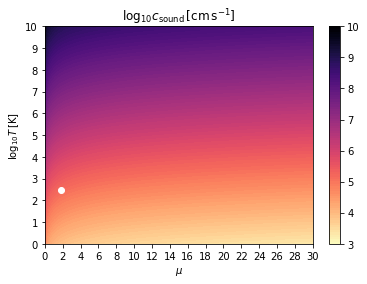

In [ ]:
# Mass fraction of each element
x = [0.78, 0.21, 0.01]

# Mass number of each element
A = [14.007, 15.999, 39.948]

#Nucleus charges of each element
Z = [7, 8, 18]

muinv = 0.

for i in range(0,3):
  muinv = muinv + (x[i]/A[i])*(1 + Z[i])

muA = 1./muinv
Tatm = 298.15

muH = 1./((1/1)*2)

print("The mean particle mass of air in our atmosphere is {}".format(round(muA,2)))
print("The mean particle mass of atomic hydrogen is {}".format(round(muH,2)))
print("The mean particle mass of air in our atmosphere is higher than that of atomic hydrogen.")
print("\n")

# Define the EOS equation
def sound_speed(mu, temp):
    gamma = 5./3.
    k_B = 1.38e-16
    amu = 1.660e-24 
    return np.sqrt((gamma*k_B*temp)/(mu*amu))

# Create a 2D grid with n and T as X and Y.
mu = np.arange(0.01,30,0.01)
temperature = np.arange(0.01,10,0.01)

X, Y = np.meshgrid(mu, temperature)

# Compute pressure on the grid
sound_speed_1D = np.array(sound_speed(np.ravel(X), np.ravel(10**Y)))
Z = sound_speed_1D.reshape(X.shape)

# Plot pressure
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, np.log10(Z), levels=np.linspace(3, 10, 91), cmap='magma_r')

ax.scatter(muA, np.log10(Tatm), c='white')

# Add a colorbar and customise axes
fig.colorbar(cp, ticks = np.arange(3,11,1))
ax.set_title(r'$\log_{10} c_{\rm sound}\,\rm [cm\,s^{-1}$]')
ax.set_xticks(np.arange(0,31.0,2.0))
ax.set_xlabel(r'$\mu$')
ax.set_yticks(np.arange(0,11,1))
ax.set_ylabel(r'$\log_{10} T\,\rm [K]$')
plt.show()

## **The Reynolds number of the blood flow in the aorta.**

Given a gas with density, $\rho$, kinematic viscosity, $\nu$, and dynamic viscosity $\mu=\rho\,\nu$, moving at a speed, $v$, the Reynolds numbers is:

$$R_{\rm e} = \frac{v\,l}{\nu} = \frac{\rho\,v\,l}{\mu}$$

where $l$ is a characteristic length of the flow.

Blood speed at the aorta: $40$ [cm/s]

Characteristic lenght of the blood flow: $1.6$[cm/m²] - $2.1$[cm/m²] (considering the viarble aorta diameter)

Blood kinematic viscosity: $2.8\times10^{-3}$ [m²/s] - $3.8\times10^{-3}$ [m²/s]




In [73]:
# Define Re function

def Re_number(rho, vel, length, mu):
    return (rho*vel*length)/(mu)

# All quantities in SI units.

rho=1060
vel=0.4
l=0.0185
mu=3.3*10e-4


Reba = Re_number(rho, vel, l, mu)
print('Reynolds number for the blood flow in  the aorta:', "{:0.5e}".format(Reba))

Reynolds number for the blood flow in  the aorta: 2.37697e+03


## **Problem 2.**
Considering the example of the swimming fish we saw in class, calculate the Reynolds numbers for different swimming speeds and make a plot of $R_{\rm e}$ vs. speed. Indicate the laminar and turbulent regimes on the plot. At which speed does the fish start generating a turbulent flow in sea water?

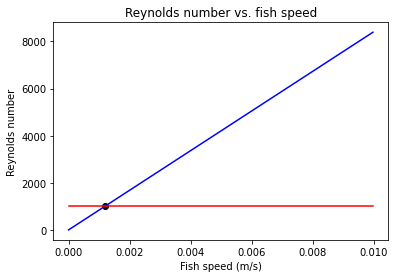

The speed at which the turbulent regime begins is 1.18908e-03 m/s


In [81]:
# Define Re function

def Re_number(rho, vel, length, mu):
    return (rho*vel*length)/(mu)

# All quantities in SI units.

mu=0.00122
le=1
rho=1026
vel1=27.78

velfish = np.ndarray(shape=500)
Refish = np.ndarray(shape=500)
turb = np.ndarray(shape=500)

v0 = 0.
dv = 0.01/500

for i in range(500):
  velfish[i] = v0 + i*dv
  turb[i] = 1.e3
  Refish[i] = Re_number(rho, velfish[i], le, mu)


yint = 1.e3
xint = (1.e3*mu)/(rho*le)

fig,ax=plt.subplots(1,1)

# plotting
plt.title("Reynolds number vs. fish speed")
plt.xlabel("Fish speed (m/s)")
plt.ylabel("Reynolds number")
plt.plot(velfish, Refish, color ="blue")
plt.plot(velfish, turb, color ="red")
ax.scatter(xint, yint, c='black')
plt.show()

print("The speed at which the turbulent regime begins is {:0.5e} m/s".format(xint))

## **Problem 3.**
Download the full dataset from the 2D turbulence simulation that we analysed in class (TURB_DRIVE) and:

 - Calculate the rms flow velocity and the corresponding rms Mach number as a function of time (see equations in the lecture notebook).
 
 
 - Save the data into a text file as shown in the example in class, and then make a plot of rms Mach number versus time. Remember that the sound speed of the simulation is $c_{\rm iso}=10\,\rm km\,s^{-1}$.
 
 
 - Based on the result above, is the gas subsonic or supersonic in this simulation?
 
 
 - Calculate the gas pressure using the isothermal equation of state ($p=\rho\,c_{\rm iso}^2$), and make and print a 2D map of the pressure for file #70.
 
 
 - Now that you have the pressure, you can calculate the so-called plasma beta of the gas, which is a dimensionless parameter that relates thermal, $p$, and magnetic pressure $\left(\frac{B^2}{8\,\pi}\right)$. Compute the plasma beta and make and print a 2D map for file #70.
 
 $$\beta = \frac{8\,\pi\,p}{B^2}$$
 

Full Data: https://www.dropbox.com/sh/gt3grmb24no04lp/AAAxAZGErA1E1cpZ0xENF1Xma?dl=0

In [112]:
!pip install vtk==8.1.2
import vtk
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
# Here we include some lines to select the file we want to read

reader = vtk.vtkDataSetReader()
reader.SetFileName('/content/drive/My Drive/Colab Notebooks/TURB_DRIVE/data.0000.vtk')

# Now, we read all the scalar and vector quantities
reader.ReadAllScalarsOn()
reader.ReadAllVectorsOn()
reader.Update()

In [101]:
# Now, let's have a first look into the data
data = reader.GetOutput()

# Let's see the data structure
print(data)

vtkRectilinearGrid (0x55afffc71ce0)
  Debug: Off
  Modified Time: 1273
  Reference Count: 2
  Registered Events: (none)
  Information: 0x55afffcf8b40
  Data Released: False
  Global Release Data: Off
  UpdateTime: 1310
  Field Data:
    Debug: Off
    Modified Time: 825
    Reference Count: 1
    Registered Events: (none)
    Number Of Arrays: 0
    Number Of Components: 0
    Number Of Tuples: 0
  Number Of Points: 2601
  Number Of Cells: 2500
  Cell Data:
    Debug: Off
    Modified Time: 1271
    Reference Count: 1
    Registered Events: 
      Registered Observers:
        vtkObserver (0x55afeee75650)
          Event: 33
          EventName: ModifiedEvent
          Command: 0x55afffcf8b00
          Priority: 0
          Tag: 1
    Number Of Arrays: 5
    Array 0 name = rho
    Array 1 name = vx1
    Array 2 name = vx2
    Array 3 name = Bx1
    Array 4 name = Bx2
    Number Of Components: 5
    Number Of Tuples: 2500
    Copy Tuple Flags: ( 1 1 1 1 1 0 1 1 )
    Interpolate Flags: 

In [102]:
dens = data.GetCellData().GetArray("rho") # in 1D -> vectors
velx = data.GetCellData().GetArray("vx1")
vely = data.GetCellData().GetArray("vx2")
bfix = data.GetCellData().GetArray("Bx1")
bfiy = data.GetCellData().GetArray("Bx2")

In [105]:
rho = np.reshape(dens,(vec[0],vec[1])) # in code units /arbitrary
vx = np.reshape(velx,(vec[0],vec[1]))
vy = np.reshape(vely,(vec[0],vec[1]))
Bx = np.reshape(bfix,(vec[0],vec[1]))
By = np.reshape(bfiy,(vec[0],vec[1]))

In [114]:
from astropy.io import ascii

In [118]:
def read_my_vtk(file_name):
    """Read Pluto's VTK simulation files and returns the variables in CGS units"""
    
    # Path to files
    input_directory="/content/drive/My Drive/Colab Notebooks/TURB_DRIVE/"
    file_name = file_name
    times_file = "vtk.out" # For times
    
    # Normalisation values
    l0 = 3.086e+18                    # Length is 1pc
    v0 = 1.e+6                        # Velocity is 10km/s
    rho0 = 1.66e-24                   # In g/cm^3
    mu = 6.72E-01                     # Mean particle mass
    mm = 1.660E-24                    # 1 Atomic mass unit
    kb = 1.380E-16                    # in CGS units
    tem0 = (mu*(mm*(v0**2))/kb)       # in K
    bfi0 = 4*np.pi*(rho0*(v0**2))   # in Gauss

    # Standard VTK loading routines
    reader= vtk.vtkDataSetReader()
    reader.SetFileName(input_directory+file_name)
    reader.ReadAllVectorsOn()
    reader.ReadAllScalarsOn()
    reader.Update()

    # Get data using hearder information
    data = reader.GetOutput() 
    dens = data.GetCellData().GetArray("rho")
    vel1 = data.GetCellData().GetArray("vx1")
    vel2 = data.GetCellData().GetArray("vx2")
    bfi1 = data.GetCellData().GetArray("Bx1")
    bfi2 = data.GetCellData().GetArray("Bx2")
    
    # Get dimensions, needed to get 2D arrays, instead of 1D vectors
    dim = data.GetDimensions()
    vec = list(dim)
    vec = [i-1 for i in dim]
    
    # Copy data into numpy arrays
    rho = np.array(dens)
    vx1 = np.array(vel1)
    vx2 = np.array(vel2)
    Bx1 = np.array(bfi1)
    Bx2 = np.array(bfi2)
    
    # Reshape them into 3D arrays
    rho = rho.reshape(vec[0],vec[1],order='F')
    vx1 = vx1.reshape(vec[0],vec[1],order='F')
    vx2 = vx2.reshape(vec[0],vec[1],order='F')
    Bx1 = Bx1.reshape(vec[0],vec[1],order='F')
    Bx2 = Bx2.reshape(vec[0],vec[1],order='F')
    
    # In astrophysical units
    rho = rho*rho0       # Gas density in g/cm^3
    nrh = rho/(mu*mm)    # Gas number density in cm^-3
    vx1 = vx1*v0/1.e5    # X-velocity component in km/s
    vx2 = vx2*v0/1.e5    # Y-velocity component in km/s
    Bx1 = Bx1*bfi0       # X-Bfield component in G
    Bx2 = Bx2*bfi0       # Y-Bfield component in G
    
    # Times
    times = ascii.read(input_directory+times_file)
    times = np.array(times['col2'])*l0/v0 # 1D array containing the simulation time in seconds
    
    return times, rho, nrh, vx1, vx2, Bx1, Bx2
    # tr1 is a cloud material tracer

In [127]:
f = open('rms_mach_number.txt', 'w')
f.write("Time Rms_Mach_Number\n")

for i in range(0,100,1):
    times, dens, number_dens, velx, vely, Bfieldx, Bfieldy = read_my_vtk('data.00{:02}.vtk'.format(i))
    
    rms_flow_speed = np.sqrt(np.mean(velx**2 + vely**2))
    rms_mach_number = rms_flow_speed/10

    f.write("{:.5e} {:.5e}\n".format(times[i], rms_mach_number))

f.close()

            Time  Rms_Mach_Number
0   0.000000e+00         0.000000
1   6.008750e+11         0.461439
2   1.225490e+12         0.749282
3   1.843370e+12         0.862008
4   2.468550e+12         0.900880
..           ...              ...
95  5.862150e+13         0.904154
96  5.923750e+13         0.886508
97  5.986380e+13         0.906963
98  6.048030e+13         0.901195
99  6.108640e+13         0.885262

[100 rows x 2 columns]


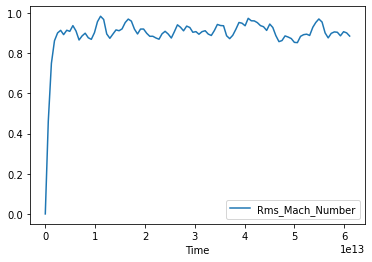

In [128]:
# From yesterday's lecture:

import pandas as pd

rms_mach_number_data = pd.read_csv('rms_mach_number.txt', sep='\s+')

%matplotlib inline
print(rms_mach_number_data)
lines = rms_mach_number_data.plot.line(x='Time', y='Rms_Mach_Number')

Based on this result, the gas in the simulation is **subsonic**.



- Calculate the gas pressure using the isothermal equation of state ($p=\rho\,c_{\rm iso}^2$), and make and print a 2D map of the pressure for file #70.

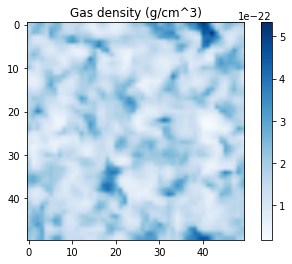

In [130]:
#Import data from file #70
times, dens, number_dens, velx, vely, Bfieldx, Bfieldy = read_my_vtk('data.0070.vtk')

dens = dens*100 #p = dens*(c_iso**2), c_iso = 10 km/h

# Gas pressure map
plt.title("Gas pressure")
plt.imshow(dens.T, interpolation='bilinear', cmap='Blues')
plt.colorbar()
plt.show()


 
 
 - Now that you have the pressure, you can calculate the so-called plasma beta of the gas, which is a dimensionless parameter that relates thermal, $p$, and magnetic pressure $\left(\frac{B^2}{8\,\pi}\right)$. Compute the plasma beta and make and print a 2D map for file #70.
 
 $$\beta = \frac{8\,\pi\,p}{B^2}$$

3.1570128e-12 1.9000745e-22 479.13492


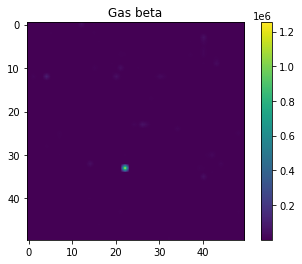

In [138]:
def magnitude(component1, component2):
    magn = np.sqrt(component1**2+component2**2)
    return magn

# Magnetic field
bmag = magnitude(Bfieldx,Bfieldy)

beta = 8*np.pi*dens/(bmag*bmag)

# Gas beta
plt.title("Gas beta")
plt.imshow(beta.T, interpolation='bilinear', cmap='viridis')
plt.colorbar()
plt.show()